In [6]:
# Import dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import scipy.stats as st
import googlemaps
#from clay_config import g_key
import gmaps
import time
from us import states
from scipy.stats import linregress
import numpy as np
import re
import csv

# Reference the file where the CSV is located
it_data = "data_scientist_US.csv"

# Import the data into a Pandas DataFrame
it_data_df = pd.read_csv(it_data)
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...


In [8]:
# create a dataframe grouping by the 'job_title' column
sorted_it_df = it_data_df.groupby('job_title')
sorted_it_df.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,2019-10-01 03:02:04 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist (HCE),computer jobs,Honeywell,Morris Plains,NJ,Usa,Morris plains,New jersey,...,The future is what you make it. \n\nWhen you j...,Full Time,NaN,monster,usa,1569902446273858,NaN,NaN,99d6d22d220231b65d9fad456e5c9e7e,<span id='TrackingJobBody' name='TrackingJobBo...
9983,2019-10-01 02:57:50 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist - Operations Research,computer jobs,Cognizant,Saint Louis,MO,Usa,Saint louis,Missouri,...,Data Scientist - Operations Research ...,Full Time,NaN,monster,usa,1569902446327977,NaN,NaN,388eb58103da5ddbd741f12044dc969f,<span id='TrackingJobBody' name='TrackingJobBo...
9986,2019-10-01 03:08:39 +0000,https://job-openings.monster.com/data-scientis...,"Data Scientist (Machine Learning, IIoT) / Manu...",computer jobs,Pioneer Data Systems,Peapack,NJ,Usa,Peapack,New jersey,...,"Our client, a world leading Pharmaceutical Com...",Undefined,NaN,monster,usa,1569902446490045,NaN,732-947-3462,6a8a7b45e7eb4bb6ca3b794dd42e1e09,<span id='TrackingJobBody' name='TrackingJobBo...
9988,2019-10-01 02:58:37 +0000,https://job-openings.monster.com/ux-data-scien...,UX Data Scientist w/Python for R&D Design Cent...,computer jobs,OSI Engineering,San Francisco,CA,Usa,San francisco,California,...,Summary \nAs the Data Scientist on the Experi...,Full Time,NaN,monster,usa,1569902447061516,NaN,NaN,39f525051833018d9e5136c34ebc29c3,<span id='TrackingJobBody' name='TrackingJobBo...


In [9]:
# Create a dataframe for counts of data
job_title_count = pd.DataFrame(sorted_it_df['job_title'].count())
job_title_count

,job_title
job_title,
(2) Lead Data Scientist (Medicare) (62400BR),2
"(3) Senior Data Scientist - (Machine Learning, R, Python)",6
"(3) Senior Data Scientist - (Machine Learning, R, Python) (62398BR)",1
"(4) Senior Data Scientist - (Machine Learning, R, Python) (62398BR)",1
(Entry Level) Data Scientist,1
...,...
"data scientist, Econometrician- Marketing Operations- Seattle, WA",1
"data scientist, Insights & Analytics - Seattle, WA",5
"data scientist, Supply Chain - Seattle, WA",2


In [10]:
# Reference the file where the second CSV is located
indeed_data= "indeed_job_dataset.csv"

# Import the data into a Pandas DataFrame
indeed_data_df = pd.read_csv(indeed_data)
indeed_data_df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [11]:
#Find out what kind of information is in the data

for icol in indeed_data_df.columns: 
    print(icol) 

Unnamed: 0
Job_Title
Link
Queried_Salary
Job_Type
Skill
No_of_Skills
Company
No_of_Reviews
No_of_Stars
Date_Since_Posted
Description
Location
Company_Revenue
Company_Employees
Company_Industry
python
sql
machine learning
r
hadoop
tableau
sas
spark
java
Others
CA
NY
VA
TX
MA
IL
WA
MD
DC
NC
Other_states
Consulting and Business Services
Internet and Software
Banks and Financial Services
Health Care
Insurance
Other_industries


In [12]:
#find out how much data is listed
itotal_rows = indeed_data_df['Job_Title'].count
print (itotal_rows)

<bound method Series.count of 0                                          Data Scientist
1                                          Data Scientist
2                                          Data Scientist
3               Graduate Studies Program - Data Scientist
4                                        Data Scientist I
                              ...                        
5710                                 Senior Data Engineer
5711    Principal Data Engineer (Java, Spark, Storm, AWS)
5712    Executive Director- Architect: Data Engineerin...
5713          Senior Manager, Data Engineering (hands on)
5714    Principal Visual Analytics / Big Data Engineer...
Name: Job_Title, Length: 5715, dtype: object>


In [13]:
#pull out only the job listings for data scientist
ds_indeed_df = indeed_data_df.loc[indeed_data_df['Job_Type'] == 'data_scientist']
ds_indeed_df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [17]:
#bcombine the 2 data sets


#both_df = it_data_df.append(ds_indeed_df,  sort=False)
pd.set_option('max_columns', len(it_data_df) + len(ds_indeed_df))
both = [it_data_df, ds_indeed_df]
#frames = [ process_file(f) for f in dataset_files ]
#result = pd.append(frames)
both_df = pd.concat(both)

both_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1.549433e+15,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1.549433e+15,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1.549433e+15,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1.549433e+15,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1.549436e+15,NaN,NaN,445652a560a5441060857853cf267470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538.0,Machine Learning SW Program Manager - 69809,https://www.indeed.com/rc/clk?jk=97f057406eef0...,>160000,data_scientist,"['PMP', 'Machine Learning', ' Project / Progra...",4.0,"Advanced Micro Devices, Inc.",401.0,3.8,27.0,[<p><b>What you do at AMD changes everything</...,CA,$5B to $10B (USD),"Less than 10,000",Computers and Electronics,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2539,NaN,NaN,NaN,NaN,NaN

In [18]:
#Find out what kind of information is in the data

for icol in both_df.columns: 
    print(icol) 

crawl_timestamp
url
job_title
category
company_name
city
state
country
inferred_city
inferred_state
inferred_country
post_date
job_description
job_type
salary_offered
job_board
geo
cursor
contact_email
contact_phone_number
uniq_id
html_job_description
Unnamed: 0
Job_Title
Link
Queried_Salary
Job_Type
Skill
No_of_Skills
Company
No_of_Reviews
No_of_Stars
Date_Since_Posted
Description
Location
Company_Revenue
Company_Employees
Company_Industry
python
sql
machine learning
r
hadoop
tableau
sas
spark
java
Others
CA
NY
VA
TX
MA
IL
WA
MD
DC
NC
Other_states
Consulting and Business Services
Internet and Software
Banks and Financial Services
Health Care
Insurance
Other_industries


In [19]:
#create a new column containing the city and state of the listing
location = ""
it_data_df['location'] = it_data_df["inferred_city"] + ", " + it_data_df["inferred_state"]
it_data_df.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,location
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,"Woodland hills, California"
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,"Middletown, New jersey"
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,"New york, New york"
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,"New york, New york"
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,"Charlotte, North carolina"


In [20]:
# Create a dataframe for counts of city, state
location_df = it_data_df.groupby('location')
location_df.head(50)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,location
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,"Woodland hills, California"
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,"Middletown, New jersey"
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,"New york, New york"
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,"New york, New york"
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,"Charlotte, North carolina"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,2019-09-28 00:56:24 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,United states,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916869271418,NaN,NaN,2bb830621baea73276f8a653e0ab92fe,<h2>About this job</h2>\r\n<p><span>Location o...,"Santa clara, New mexico"
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,United states,2019-09-27,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,"Columbus, Wisconsin"
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,United states,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,"Santa clara, New mexico"
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,United states,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,"Santa clara, New mexico"


In [21]:
#pull the location and counts into a df
location_count = pd.DataFrame(location_df['location'].count())
location_count['count'] = location_count['location'].astype(str)
location_count

,location,count
location,,
"Aberdeen, Maryland",9,9
"Addison, Texas",9,9
"Adrian, Michigan",1,1
"Akron, Ohio",5,5
"Albany, New york",3,3
...,...,...
"Woodland, California",2,2
"Woodlawn, Maryland",3,3
"Woonsocket, Rhode island",1,1


In [22]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

#get lat and long for the cities
gmaps_key= googlemaps.Client(key=g_key)
location_count['lat'] = None
location_count['lon'] = None
for i in range(0,len(location_count), 1):
    geocode_result = gmaps_key.geocode(location_count.iat[i,0])
    try:
        lat=geocode_result[0]['geometry']['location']['lat']
        lon=geocode_result[0]['geometry']['location']['lng']
        location_count.iat[i, location_count.columns.get_loc("lat")] = lat
        location_count.iat[i, location_count.columns.get_loc("lon")] = lon
    except:
        lat= 'NaN'
        lon= 'NaN'

location_count

NameError: name 'g_key' is not defined

In [ ]:
#clean the dataframe
location_count = location_count.dropna()
location_count.head(50)   

In [23]:
#Call the gmaps function
fig = gmaps.figure()

# Store 'Lat' and 'Lng' into  locations 
locations = location_count[["lat", "lon"]].astype(float)
counts = location_count['count'].astype(float)

#create the heatmap
heat_layer = gmaps.heatmap_layer(locations, weights=counts, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

KeyError: "None of [Index(['lat', 'lon'], dtype='object')] are in the [columns]"

In [24]:
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [25]:
ds_indeed_df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",TX,NaN,NaN,NaN,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,1.0,"[<ul><li>Validate, analyze, and conduct statis...",OR,NaN,NaN,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,30.0,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,NaN,NaN,Government,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,30.0,[<ul><li>Assist in consultations with business...,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
#Pull only the first string in the Location column to clean the data
ds_indeed_df['Location'] = ds_indeed_df['Location'].astype(str).str.split(" ").str[0] 
ds_indeed_df.head(50)

c:\users\kynat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",TX,NaN,NaN,NaN,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,1.0,"[<ul><li>Validate, analyze, and conduct statis...",OR,NaN,NaN,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,30.0,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,NaN,NaN,Government,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,30.0,[<ul><li>Assist in consultations with business...,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,30.0,[<ul><li>Collecting and combining data from mu...,MD,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,5.0,NaN,NY,NaN,NaN,Government,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,10.0,"[<p>With demand sensing, OM Partners is breaki...",GA,NaN,NaN,NaN,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,1.0,[<ul><li>Masters degree in Bioinformatics or t...,ID,NaN,NaN,Education and Schools,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,22.0,"[<ul><div><h2 class=""jobSectionHeader""><b>Duti...",MO,NaN,"10,000+",Government,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [29]:
#rearrange the dataframe to put locations together
ilocation_df = ds_indeed_df.groupby('Location')

#create a datafram for the location and count
ilocation_count = pd.DataFrame(ilocation_df['Location'].count())
#ilocation_count['count'] = ilocation_count
#ilocation_count['count'] = location_count['Location'].astype(str)

In [30]:
ilocation_count['count'] = ilocation_count['Location'].astype(float)
ilocation_count

,Location,count
Location,,
AL,9,9.0
AR,18,18.0
AZ,24,24.0
CA,723,723.0
CO,47,47.0
CT,32,32.0
DC,68,68.0
DE,7,7.0
FL,43,43.0


In [31]:
#copy the location index column into a column that plotly will recognize
ilocation_count['index1'] = ilocation_count.index

In [32]:
ilocation_count

,Location,count,index1
Location,,,
AL,9,9.0,AL
AR,18,18.0,AR
AZ,24,24.0,AZ
CA,723,723.0,CA
CO,47,47.0,CO
CT,32,32.0,CT
DC,68,68.0,DC
DE,7,7.0,DE
FL,43,43.0,FL


In [33]:
#drop the data that are not states
ilocation_count = ilocation_count.drop(['REMOTE', 'USA', 'nan'])

ilocation_count


,Location,count,index1
Location,,,
AL,9,9.0,AL
AR,18,18.0,AR
AZ,24,24.0,AZ
CA,723,723.0,CA
CO,47,47.0,CO
CT,32,32.0,CT
DC,68,68.0,DC
DE,7,7.0,DE
FL,43,43.0,FL


In [34]:

import plotly.graph_objects as go

#create the choropleth map

fig = go.Figure(data=go.Choropleth(
    locations=ilocation_count['index1'], # Spatial coordinates
    z = ilocation_count['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Job Postings",
))

fig.update_layout(
    title_text = 'Indeed Job Postings by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

ModuleNotFoundError: No module named 'plotly'

In [35]:
# Print one job description to ensure that the text is showing a job posting.
print(it_data_df['job_description'][1])

We have an immediate opening for a Sharp Data Scientist with a strong Mathematical/Statistical background to work on various initiatives in a Huge data environment. Will be looking at various formats of Data dealing with Billing Fraud Patterns using various software and modeling techniques. The candidate should have a minimum of 3 years of solid work experience in a professional organization/corporation using Python, SQL, Python libraries, Machine Learning Algorithms ( i.e. Decision Tree, Random Forest, Logistic Regression, etc.) should have strong Python skills. Additional experience with R Cloud would be a plus. Will be working with structured and unstructured data formats so any experience with Hive, and other Big Data technologies would be a plus. Should have strong communication skills and the ability to explain data findings to both Technical and Non- Technical audiences. We are NOT considering Recent College Grads- MUST have a minimum of 2-3 post Graduate experience working in a

In [36]:
# Identify if each job description contains the keyword string "Python" (a highly sought after programming language!)
p = 'Python'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),"Python"] = True
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,location,Python
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,"Woodland hills, California",True


In [37]:
# Count the amount value counts (vcs) for the newly created "Python" column
# This will indicate how many of the job descriptions included "Python" in their posting
# Note: casting it to a float so that it can easily be incorporated into a bar plot later
python_vcs = float(it_data_df['Python'].value_counts())
python_vcs

7803.0

In [38]:
# Identify if each job description contains the keyword string "Excel" (short for "Microsoft Excel")
# (Since there could be a variety in how this is included in the job posting,
# it was decided to use "Excel" as a way to cover the most amount of potential inclusions of this skill.)
p = 'Excel'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),"Excel"] = True
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,location,Python,Excel
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,"Woodland hills, California",True,NaN


In [39]:
# Count the amount value counts (vcs) for the newly created "Excel" column
# This will indicate how many of the job descriptions included "Excel" in their posting
excel_vcs = float(it_data_df['Excel'].value_counts())
excel_vcs

2919.0

In [40]:
# Identify if each job description contains the keyword string "SQL"
p = 'SQL'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),'SQL'] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,location,Python,Excel,SQL
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,"Woodland hills, California",True,NaN,True


In [41]:
# Count the amount value counts (vcs) for the newly created "SQL" column
# This will indicate how many of the job descriptions included "SQL" in their posting
sql_vcs = float(it_data_df['SQL'].value_counts())
sql_vcs

5743.0

In [42]:
# Identify if each job description contains the keyword string "Java" (another common programming language)
p = 'Java'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),'Java'] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,location,Python,Excel,SQL,Java
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,"Woodland hills, California",True,NaN,True,NaN


In [43]:
# Count the amount value counts (vcs) for the newly created "Java" column
# This will indicate how many of the job descriptions included "Java" in their posting
java_vcs = float(it_data_df['Java'].value_counts())
java_vcs

2390.0

In [44]:
# Identify if each job description contains the keyword string "Machine Learning" (another highly sought-out skill!)
p = 'Machine Learning'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),'Machine Learning'] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,location,Python,Excel,SQL,Java,Machine Learning
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,"Woodland hills, California",True,NaN,True,NaN,NaN


In [45]:
# Count the amount value counts (vcs) for the newly created "Machine Learning" column
# This will indicate how many of the job descriptions included "Machine Learning" in their posting
ml_vcs = float(it_data_df['Machine Learning'].value_counts())
ml_vcs

2534.0

In [46]:
# Identify if each job description contains the keyword string "Tableau"
p = 'Tableau'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),"Tableau"] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,location,Python,Excel,SQL,Java,Machine Learning,Tableau
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,"Woodland hills, California",True,NaN,True,NaN,NaN,True


In [47]:
# Count the amount value counts (vcs) for the newly created "Tableau" column
# This will indicate how many of the job descriptions included "Tableau" in their posting
tableau_vcs = float(it_data_df['Tableau'].value_counts())
tableau_vcs

2141.0

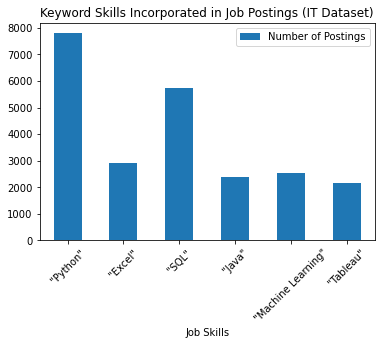

In [48]:
# Combine all the IT dataset skill keyword findings into a bar graph
df = pd.DataFrame({'Job Skills':['"Python"', '"Excel"', '"SQL"', '"Java"', '"Machine Learning"', '"Tableau"'], 
                   'Number of Postings':[python_vcs, excel_vcs, sql_vcs, java_vcs, ml_vcs, tableau_vcs]})
df.plot.bar(x='Job Skills', y='Number of Postings', rot=45)
plt.title("Keyword Skills Incorporated in Job Postings (IT Dataset)")
plt.show
plt.savefig("IT_Data__Bars", bbox_inches='tight')

In [49]:
## Do the same analysis for a different data set to compare the results

# Reference the file where the CSV is located
indeed_data = "indeed_job_dataset.csv"

# Import the data into a Pandas DataFrame
indeed_df = pd.read_csv(indeed_data)
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [50]:
# Note that this dataset incorporates a "Skill" column, with keywords job skills, often programming languages, already highlighted
# Identify if each "Skill" column contains the keyword string "Python" in this data set
p = 'Python'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Python"] = True
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,NaN


In [51]:
# Count the amount value counts (vcs) for the newly created "Python" column
# This will indicate how many of the job descriptions included "Python" in their posting
indeed_python_vcs = float(indeed_df['Python'].value_counts())
indeed_python_vcs

3325.0

In [52]:
# Identify if each "Skill" column contains the keyword string "Excel", short for "Microsoft Excel"
# (Since there could be a variety in how this is included in the job posting,
# it was decided to use "Excel" as a way to cover the most amount of potential inclusions of this skill.)
p = 'Excel'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Excel"] = True
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,NaN,NaN


In [53]:
# Count the amount value counts (vcs) for the newly created "Excel" column
# This will indicate how many of the job descriptions included "Excel" in their posting
indeed_excel_vcs = float(it_data_df['Excel'].value_counts())
indeed_excel_vcs

2919.0

In [21]:
# Identify if each "Skill" column contains the keyword string "SQL"
p = 'SQL'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"SQL"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,1,0,0,0,1,0,0,NaN,NaN,True


In [54]:
# Count the amount value counts (vcs) for the newly created "SQL" column
# This will indicate how many of the job descriptions included "SQL" in their posting
indeed_sql_vcs = float(it_data_df['SQL'].value_counts())
indeed_sql_vcs

5743.0

In [55]:
# Identify if each "Skill" column contains the keyword string "Java"
p = 'Java'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Java"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,Java
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,NaN,NaN,NaN


In [56]:
# Count the amount value counts (vcs) for the newly created "Java" column
# This will indicate how many of the job descriptions included "Java" in their posting
indeed_java_vcs = float(it_data_df['Java'].value_counts())
indeed_java_vcs

2390.0

In [57]:
# Identify if each "Skill" column contains the keyword string "Machine Learning" in this data set
p = 'Machine Learning'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Machine Learning"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,Java,Machine Learning
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,NaN,NaN,NaN,NaN


In [58]:
# Count the amount value counts (vcs) for the newly created "Java" column
# This will indicate how many of the job descriptions included "Java" in their posting
indeed_ml_vcs = float(it_data_df['Machine Learning'].value_counts())
indeed_ml_vcs

2534.0

In [27]:
# Identify if each "Skill" column contains the keyword string "Tableau" in this data set
p = 'Tableau'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Tableau"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL,Java,Machine Learning,Tableau
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,1,0,0,NaN,NaN,True,NaN,NaN,NaN


In [59]:
# Count the amount value counts (vcs) for the newly created "Tableau" column
# This will indicate how many of the job descriptions included "Tableau" in their posting
indeed_tableau_vcs = float(it_data_df['Tableau'].value_counts())
indeed_tableau_vcs

2141.0

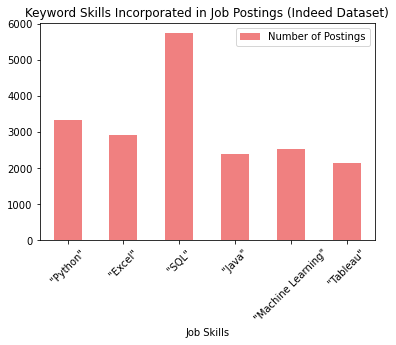

In [60]:
# Combine all the IT dataset skill keyword findings into a bar graph
df = pd.DataFrame({'Job Skills':['"Python"', '"Excel"', '"SQL"', '"Java"', '"Machine Learning"', '"Tableau"'], 
                   'Number of Postings':[indeed_python_vcs, indeed_excel_vcs, indeed_sql_vcs, indeed_java_vcs, 
                                         indeed_ml_vcs, indeed_tableau_vcs]})
df.plot.bar(x='Job Skills', y='Number of Postings', rot=45, color="lightcoral")
plt.title("Keyword Skills Incorporated in Job Postings (Indeed Dataset)")
plt.show
plt.savefig("INDEED_Data__Bars.png", bbox_inches='tight')

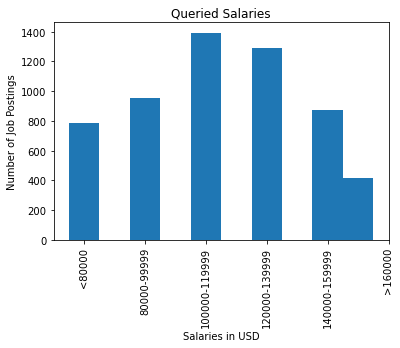

In [61]:
# Construct a histogram from the available salary data in the Indeed dataset to see probable salary estimates as available from the Indeed data set.
plt.hist(indeed_df['Queried_Salary'], align="left")
plt.title("Queried Salaries")
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.xlabel('Salaries in USD')
plt.ylabel('Number of Job Postings')
indeed_df['Queried_Salary']
plt.savefig("Salary_Bars.png", bbox_inches='tight')
plt.show()

In [62]:
# Create a dataframe grouping by the 'job_title' column
sorted_it_df = it_data_df.groupby('job_title')
sorted_it_df.head(5)

# Clean up data frame for more consistent text entries

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,location,Python,Excel,SQL,Java,Machine Learning,Tableau
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,"Woodland hills, California",True,NaN,True,NaN,NaN,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,"Middletown, New jersey",True,NaN,True,NaN,True,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,"New york, New york",NaN,NaN,NaN,True,NaN,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,"New york, New york",True,NaN,True,NaN,NaN,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,"Charlotte, North carolina",True,True,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,2019-10-01 03:02:04 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist (HCE),computer jobs,Honeywell,Morris Plains,NJ,Usa,Morris plains,New jersey,United states,2019-09-02,The future is what you make it. \n\nWhen you j...,Full Time,NaN,monster,usa,1569902446273858,NaN,NaN,99d6d22d220231b65d9fad456e5c9e7e,<span id='TrackingJobBody' name='TrackingJobBo...,"Morris plains, New jersey",NaN,NaN,NaN,NaN,NaN,NaN
9983,2019-10-01 02:57:50 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist - Operations Research,computer jobs,Cognizant,Saint Louis,MO,Usa,Saint louis,Missouri,United states,2019-09-30,Data Scientist - Operations Research ...,Full Time,NaN,monster,usa,1569902446327977,NaN,NaN,388eb58103da5ddbd741f12044dc969f,<span id='TrackingJobBody' name='TrackingJobBo...,"Saint louis, Missouri",True,NaN,NaN,True,NaN,NaN
9986,2019-10-01 03:08:39 +0000,https://job-openings.monster.com/data-scientis...,"Data Scientist (Machine Learning, IIoT) / Manu...",computer jobs,Pioneer Data Systems,Peapack,NJ,Usa,Peapack,New jersey,United states,2019-09-30,"Our client, a world leading Pharmaceutical Com...",Undefined,NaN,monster,usa,1569902446490045,NaN,732-947-3462,6a8a7b45e7eb4bb6ca3b794dd42e1e09,<span id='TrackingJobBody' name='TrackingJobBo...,"Peapack, New jersey",True,NaN,NaN,NaN,True,NaN
9988,2019-10-01 02:58:37 +0000,https://job-openings.monster.com/ux-data-scien...,UX Data Scientist w/Python for R&D Design Cent...,computer jobs,OSI Engineering,San Francisco,CA,Usa,San francisco,California,United states,2019-09-30,Summary \nAs the Data Scientist on the Experi...,Full Time,NaN,monster,usa,1569902447061516,NaN,Na

In [63]:
# Create a dataframe for counts of data
job_title_count = pd.DataFrame(sorted_it_df['job_title'].count())

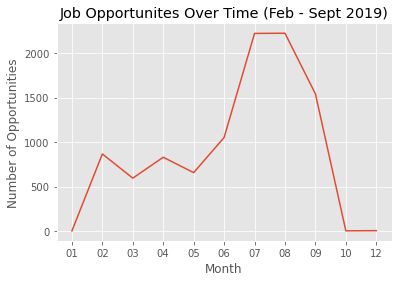

In [64]:
# Job openings by posting date:
    # Line graph that illustrates the consistency of 
    # Data Science job listings over (approximately)
    # the last year. Outlier data was removed to provide
    # a more accurate view of the availability of jobs. 
    # The data set terminated prior to the end of 2019,
    # so all months were not available.

# Dropping rows with missing data
by_date = it_data_df[['post_date']].dropna(how='any')

# Creating a new column for a new date format
by_date['month'] = pd.to_datetime(by_date['post_date'])

# Changes each date to a year/month format for simplified, easy-to-read graph
by_date['month'] = by_date['month'].apply(lambda x: x.strftime('%m'))

#ordered_openings_by_date = openings_by_date.sort_values('Job_Posting_Date', ascending=True)
openings_by_date = by_date['month'].value_counts().rename_axis('Job_Posting_Date').reset_index(name = 'Count')
openings_by_date = openings_by_date.sort_values('Job_Posting_Date',ascending=True)

# Create and show chart
plt.plot(openings_by_date['Job_Posting_Date'], openings_by_date['Count'])
plt.title('Job Opportunites Over Time (Feb - Sept 2019)')
plt.xlabel('Month')
plt.ylabel('Number of Opportunities')
# Save chart
plt.savefig('JobsOverTimeLineGraph.png')
# Display chart
plt.show()



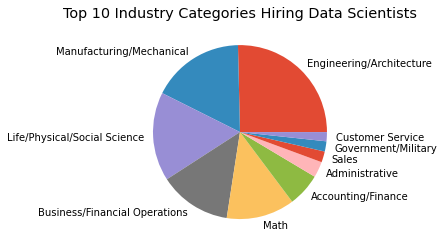

In [65]:
# Most openings by category:
    # Sorts the category column and creates a bar graph to 
    # highlight the 10 industry categories with the highest
    # number of job opportunities for data scientists.

# Drop rows with missing data
by_category = it_data_df[['category']].dropna(how='any')

# Combining redundant categories
by_category['category'] = by_category['category'].replace('Engineering-or-architecture', 'Engineering/Architecture')
by_category['category'] = by_category['category'].replace('architecture and engineering', 'Engineering/Architecture')
by_category['category'] = by_category['category'].replace('Accounting-or-finance', 'Accounting/Finance')
by_category['category'] = by_category['category'].replace('Manufacturing-or-mechanical', 'Manufacturing/Mechanical')

# Cleaning up/standardizing category names for a more cohesive and nicer-looking graph
by_category['category'] = by_category['category'].replace('math jobs', 'Math')
by_category['category'] = by_category['category'].replace('Government-or-military', 'Government/Military')
by_category['category'] = by_category['category'].replace('Customer-Service', 'Customer Service')
by_category['category'] = by_category['category'].replace('business and financial operations', 'Business/Financial Operations')
by_category['category'] = by_category['category'].replace('life physical and social science', 'Life/Physical/Social Science')

openings_by_category_name = by_category['category'].value_counts().rename_axis('Category').reset_index(name = 'Count')
openings_by_category_name.sort_values('Count',ascending=False)

# Filtering out ambiguous/less helpful categories
filtered_data_frame = openings_by_category_name[~openings_by_category_name['Category'].str.contains('computer jobs')]
filtered_data_frame = filtered_data_frame[~filtered_data_frame['Category'].str.contains('Computer-or-internet')]
filtered_data_frame = filtered_data_frame[~filtered_data_frame['Category'].str.contains('Computer/Internet')]
filtered_data_frame = filtered_data_frame[~filtered_data_frame['Category'].str.contains('Data Scientist')]

# Displaying/formatting graph
top_10_categories = filtered_data_frame.sort_values('Count', ascending=False).head(10)

plt.pie(top_10_categories['Count'],labels = top_10_categories['Category'])
plt.title("Top 10 Industry Categories Hiring Data Scientists")

# Save chart
plt.savefig('CategoryPie.png', bbox_inches='tight')

plt.show()



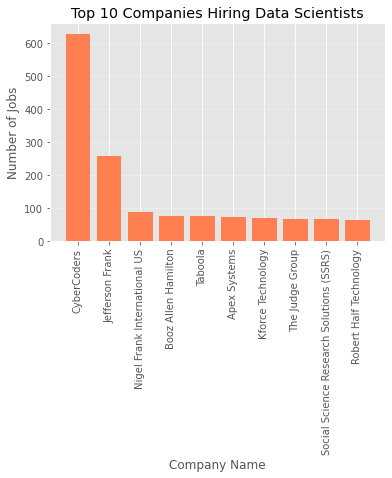

In [66]:
# Most openings by company:
    # Sorts the company_name column and creates a bar graph to 
    # highlight the 10 companies with the highest number of job
    # opportunities for data scientists.

# Dropping rows that are missing data
by_company_name = it_data_df[['company_name']].dropna(how='any')

# Graph content
openings_by_company_name = by_company_name['company_name'].value_counts().rename_axis('Company').reset_index(name = 'Count')
openings_by_company_name.sort_values('Count',ascending=False)

top_10_companies = openings_by_company_name.sort_values('Count', ascending=False).head(10)

# Graph creation and formatting
plt.bar(top_10_companies['Company'],top_10_companies['Count'], color = 'coral')
plt.xticks(rotation = 90)
plt.grid(linestyle = '--', axis = 'y', alpha = 0.5)
plt.title('Top 10 Companies Hiring Data Scientists')
plt.xlabel('Company Name')
plt.ylabel('Number of Jobs')
# Save chart
plt.savefig('CompaniesBar.png', bbox_inches='tight')
plt.show()

